In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia=cv2.imread('DATA/Nadia_Murad.jpg',0)
denis=cv2.imread('DATA/Denis_Mukwege.jpg',0)
solvey=cv2.imread('DATA/solvay_conference.jpg',0)

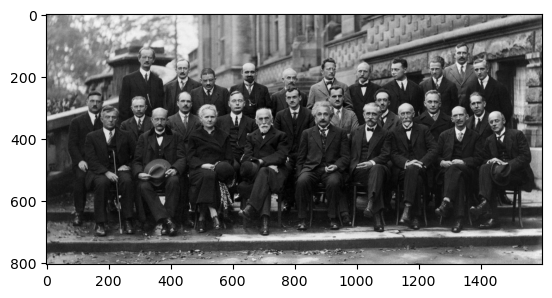

In [9]:
plt.imshow(solvey,cmap='gray')

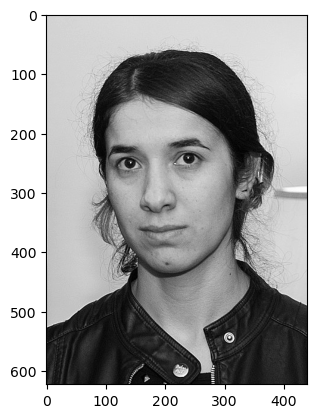

In [10]:
plt.imshow(nadia,cmap='gray')

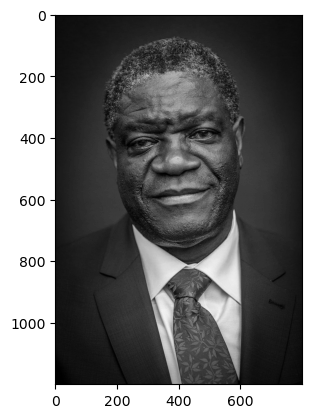

In [11]:
plt.imshow(denis,cmap='gray')

In [20]:
face_cascade=cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [27]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

In [28]:
result=detect_face(solvey)

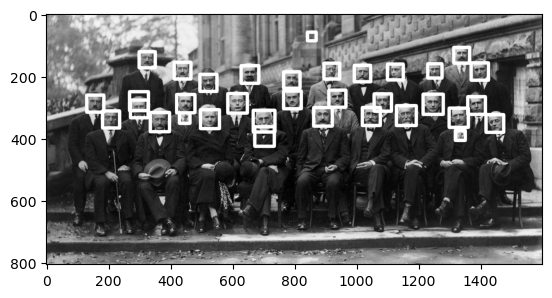

In [29]:
plt.imshow(result,cmap='gray')

In [30]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

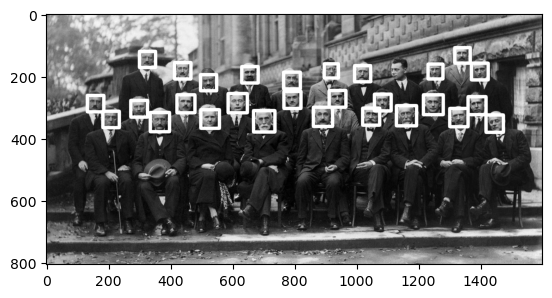

In [31]:
result=adj_detect_face(solvey)
plt.imshow(result,cmap='gray')

In [44]:
eye_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [51]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes_rects = eye_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in eyes_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

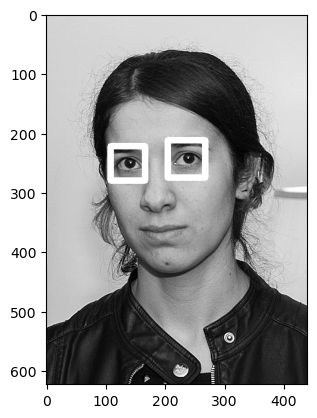

In [56]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

In [53]:
eyes = eye_cascade.detectMultiScale(denis) 

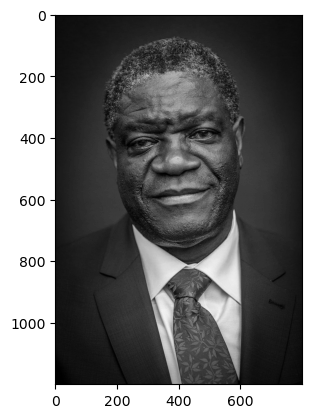

In [54]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

In [57]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()